<a href="https://colab.research.google.com/github/hhchin1995/water-quality-clustering/blob/main/GroundWater.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ground water clustering and decision tree for classification

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

!pip install bioinfokit
import bioinfokit

     |████████████████████████████████| 84 kB 2.9 MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.0.8-py3-none-any.whl size=56749 sha256=cc194031efe4aa97969ffff7b7d0ce21deefc976e090666650ace7f0acedba88
  Stored in directory: /root/.cache/pip/wheels/0d/b0/a4/2be59655e33c889f2197d43e99ed077f05a6559e24ce28e21a
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7094 sha256=bbef6287b35e540ae7184e9109dec85d158074d7401795bfe64aec5172a55122
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built bioinfokit adjustText


## Importing the dataset

In [ ]:
from google.colab import files
import io
uploaded = files.upload()

# dataset = pd.read_csv('PRES_plastic4-1.csv')
dataset = pd.read_csv('Groundwater_3.csv')
# PET
# X = dataset.iloc[:-54, 2:4].values
# y = dataset.iloc[:-54, 5].values

# PE
# X = dataset.iloc[15:-20, 2:5].values
# X[:,1]=X[:,2]
# X=X[:,:-1]
# y = dataset.iloc[15:-20, 5].values



# PP
# X = dataset.iloc[50:, 2:5].values
# X[:,1]=X[:,2]
# X=np.delete(X,8,0)
# X=X[:,:-1]
# y = dataset.iloc[50:, 5].values
# y=np.delete(y,8,0)
X_c = dataset.iloc[0:300, 0:12].values

# Demand=dataset.iloc[300:303,0:12].values
Supply=dataset.iloc[300:305,0:12].values
Demand=dataset.iloc[305:308,0:12].values
print(Supply)
print(Demand)

# y_ori=dataset.iloc[:, 0].values


# print(X_c)


Saving Groundwater_3.csv to Groundwater_3.csv
[[1.90305917e+03 3.11980487e+02 1.78997491e+02 1.01635286e+04
  4.91059418e+02 7.03809241e+01 1.48788362e+02 8.15407588e+00
  1.56285450e+02 1.62896995e+03 1.31141082e+01 7.77544550e+00]
 [1.28456189e+03 1.28299978e+02 8.12381676e+01 4.03921375e+03
  2.64308986e+02 5.68135457e+01 8.25085721e+01 8.06032844e+00
  1.38674051e+02 1.21632928e+03 1.10535944e+01 5.86874423e+00]
 [1.89518187e+03 2.54637068e+02 2.32458804e+02 6.97676816e+03
  5.01585407e+02 6.88704723e+01 1.47802292e+02 8.11440709e+00
  1.52467635e+02 2.80342265e+03 1.40112085e+01 7.56095448e+00]
 [2.15336716e+03 3.96216198e+02 5.71011932e+02 3.60806880e+03
  9.69214775e+02 9.57725623e+01 1.54938902e+02 8.37771941e+00
  2.46789939e+02 3.74895209e+03 1.72617436e+01 9.39704608e+00]
 [5.84493652e+02 2.78577154e+01 1.29661144e+01 8.89041667e+02
  4.77443944e+01 2.53799993e+01 5.35722995e+01 7.52042816e+00
  1.14854443e+02 7.00393335e+02 8.45096570e-01 8.72751628e-01]]
[[5.66199553e+02 9

## Feature Scaling

In [ ]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# sc.fit(X_c)
# X_c=sc.transform(X_c)
X_c=sc.fit_transform(X_c)
Supply=sc.transform(Supply)
Demand=sc.transform(Demand)

# X_test_sc=sc.transform(X_test)

print(X_c)
# print(X_test_sc)

[[ 0.91121869  1.46343753  0.8652601  ...  1.66841545  0.87174504
   0.855433  ]
 [ 0.37048502 -0.79591918 -0.5957418  ... -0.49989962 -0.93273105
  -1.06685552]
 [-1.39836614 -1.1346681  -0.96789098 ... -1.0262029  -1.32268235
  -1.45452245]
 ...
 [ 1.05343957  1.59217518  1.25156603 ...  1.10950851  0.87358843
   0.97780256]
 [ 0.9183777   1.53075027  1.620054   ...  1.32694032  0.97180036
   0.91132638]
 [-1.80766118 -1.25125702 -0.98726203 ... -1.26130376 -1.33820428
  -1.34586692]]


Custom Sampling (clean data)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

# Scale Features
scaler = StandardScaler()
x_c_scaled = X_c


# Fit KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_c_scaled, y_train)
preds = pd.DataFrame(knn.predict_proba(x_c_scaled))

preds.columns = ['label_0', 'label_1','label_2','label_3','label_4']

# Bind defaulted label proba to train dataset
# print(preds.iloc[1,2])

y_prob=np.zeros((len(y_train),1))
for i in range(0,len(y_train)):
  y_prob[i]=preds.iloc[i,int(y_train[i])-1]

#print(y_prob)
# X_train['knn_minority_class_proba'] = preds['label_1']

x_c_filtered=np.zeros(X_c.shape)
y_train_filtered=np.zeros(X_c.shape[0])

for ii in range(0,len(y_train_filtered)):
  if y_prob[ii]>=0.5:
    x_c_filtered[ii,:] = X_c[ii,:]
    y_train_filtered[ii] = y_train[ii]

x_c_filtered=x_c_filtered[np.all(x_c_filtered != 0, axis=1), :]
y_train_filtered=y_train_filtered[y_train_filtered >0]


# Oversample using SMOTE
sm = SMOTE(k_neighbors=1,random_state=40)
X_c, y_train = sm.fit_resample(x_c_filtered, y_train_filtered)

print(X_c)

Clustering

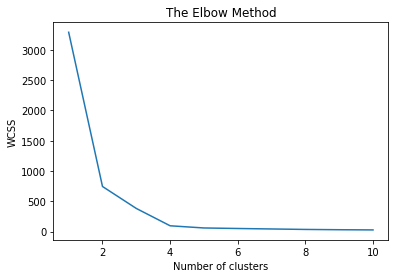

In [ ]:
# Using the elbow method to find the optimal number of clusters




#####X_c=X_train


#X_c = sc.fit_transform(X_c)




from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_c)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Applying PCA on data**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)    # Set to 7 for 90% variance
X_c= pca.fit_transform(X_c)
Supply=pca.transform(Supply)
Demand=pca.transform(Demand)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))



# # loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'],
# # #                                                    'PC7', 'PC8','PC9', 'PC10','PC11', 'PC12',
# # #                                                    'PC13', 'PC14'],
# #                          index=dataset.columns[2:])
# # print(loadings)

# Applying Kernel PCA
# from sklearn.decomposition import KernelPCA
# kpca = KernelPCA(n_components = 2, kernel = 'rbf')
# X_c = kpca.fit_transform(X_c)

# Supply=kpca.transform(Supply)
# Demand=kpca.transform(Demand)

# # X_test_kpca=kpca.transform(X_test_sc)

# kpca_transform = kpca.fit_transform(X_c)
# explained_variance = np.var(kpca_transform, axis=0)
# ev = explained_variance / np.sum(explained_variance)
# print(ev)
# print(sum(ev))

# print(X_test_kpca)



[0.8553842  0.05830736]
0.9136915593758765


(300, 2)
0.7758395297282114
0.3173482616532517
3301.943488370387


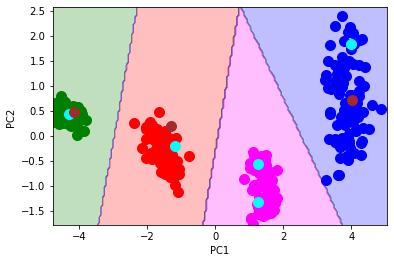

In [ ]:

# Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_c)
Supply_kmeans=kmeans.predict(Supply)
Demand_kmeans=kmeans.predict(Demand)
#X_c = sc.inverse_transform(X_c)
# kmeans.cluster_centers_ = sc.inverse_transform(kmeans.cluster_centers_)

# Visualising the clusters
from matplotlib.colors import ListedColormap
X1, X2 = np.meshgrid(np.arange(start = X_c[:, 0].min()-0.01, stop = X_c[:, 0].max()+0.2, step = 0.05),
                     np.arange(start = X_c[:, 1].min()-0.01, stop = X_c[:, 1].max()+0.2, step = 0.05))
plt.contourf(X1, X2, kmeans.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.25, cmap = ListedColormap(('red', 'blue','green','magenta')))

plt.scatter(X_c[y_kmeans == 0, 0], X_c[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_c[y_kmeans == 1, 0], X_c[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_c[y_kmeans == 2, 0], X_c[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_c[y_kmeans == 3, 0], X_c[y_kmeans == 3, 1], s = 100, c = 'magenta', label = 'Cluster 4')
# plt.scatter(X_c[y_kmeans == 4, 0], X_c[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.scatter(Supply[Supply_kmeans == 0, 0], Supply[Supply_kmeans == 0, 1], s = 100, c = 'cyan', label = 'Source')
plt.scatter(Supply[Supply_kmeans == 1, 0], Supply[Supply_kmeans == 1, 1], s = 100, c = 'cyan', label = 'Source')
plt.scatter(Supply[Supply_kmeans == 2, 0], Supply[Supply_kmeans == 2, 1], s = 100, c = 'cyan', label = 'Source')
plt.scatter(Supply[Supply_kmeans == 3, 0], Supply[Supply_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Source')
plt.scatter(Demand[Demand_kmeans == 0, 0], Demand[Demand_kmeans == 0, 1], s = 100, c = 'brown', label = 'Demand')
plt.scatter(Demand[Demand_kmeans == 1, 0], Demand[Demand_kmeans == 1, 1], s = 100, c = 'brown', label = 'Demand')
plt.scatter(Demand[Demand_kmeans == 2, 0], Demand[Demand_kmeans == 2, 1], s = 100, c = 'brown', label = 'Demand')
plt.scatter(Demand[Demand_kmeans == 3, 0], Demand[Demand_kmeans == 3, 1], s = 100, c = 'brown', label = 'Demand')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
# plt.title('Clusters of plastic waste')
plt.xlabel('PC1')
plt.ylabel('PC2 ')
# plt.legend()
# plt.show()
print(X_c.shape)
# Evaluation
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score

labels = kmeans.labels_
print(metrics.silhouette_score(X_c, labels, metric='euclidean'))
print(davies_bouldin_score(X_c, labels))
print(metrics.calinski_harabasz_score(X_c, labels))

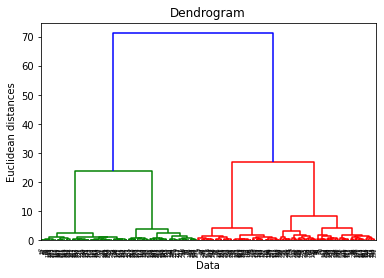

In [ ]:
import scipy.cluster.hierarchy as sch
#X_c = sc.fit_transform(X_c)

dendrogram = sch.dendrogram(sch.linkage(X_c, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Data')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
# Training the Hierarchical Clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters =4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_c)
#X_c = sc.inverse_transform(X_c)



# Evaluation
print(metrics.silhouette_score(X_c, y_hc, metric='euclidean'))
print(davies_bouldin_score(X_c, y_hc))
print(metrics.calinski_harabasz_score(X_c, y_hc))

0.7758395297282114
0.3173482616532517
3301.943488370387


In [ ]:
# Fit KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_c, y_hc)

y_supply=knn.predict(Supply)
y_demand=knn.predict(Demand)

preds_supply = pd.DataFrame(knn.predict_proba(Supply))

preds_demand = pd.DataFrame(knn.predict_proba(Demand))

preds_supply.columns = ['label_0', 'label_1','label_2','label_3']
preds_demand.columns = ['label_0', 'label_1','label_2','label_3']

print(preds_supply)
print(preds_demand)

   label_0  label_1  label_2  label_3
0      0.0      0.0      1.0      0.0
1      0.0      1.0      0.0      0.0
2      0.0      0.0      1.0      0.0
3      1.0      0.0      0.0      0.0
4      0.0      0.0      0.0      1.0
   label_0  label_1  label_2  label_3
0      0.0      0.0      0.0      1.0
1      0.0      1.0      0.0      0.0
2      1.0      0.0      0.0      0.0


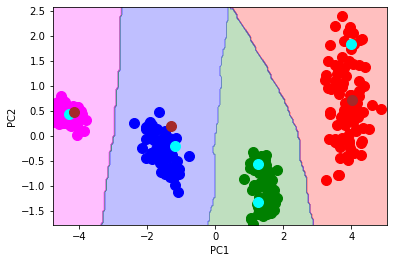

In [ ]:
# Visualising the clusters
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_c, y_hc)

X1, X2 = np.meshgrid(np.arange(start = X_c[:, 0].min()-0.01, stop = X_c[:, 0].max()+0.2, step = 0.05),
                     np.arange(start = X_c[:, 1].min()-0.01, stop = X_c[:, 1].max()+0.2, step = 0.05))
plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.25, cmap = ListedColormap(('red', 'blue','green','magenta')))

plt.scatter(X_c[y_hc == 0, 0], X_c[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_c[y_hc == 1, 0], X_c[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_c[y_hc == 2, 0], X_c[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_c[y_hc == 3, 0], X_c[y_hc == 3, 1], s = 100, c = 'magenta', label = 'Cluster 4')
# plt.scatter(X_c[y_hc == 4, 0], X_c[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.scatter(Supply[y_supply == 0, 0], Supply[y_supply == 0, 1], s = 100, c = 'cyan', label = 'Source')
plt.scatter(Supply[y_supply == 1, 0], Supply[y_supply == 1, 1], s = 100, c = 'cyan', label = 'Source')
plt.scatter(Supply[y_supply == 2, 0], Supply[y_supply == 2, 1], s = 100, c = 'cyan', label = 'Source')
plt.scatter(Supply[y_supply == 3, 0], Supply[y_supply == 3, 1], s = 100, c = 'cyan', label = 'Source')
plt.scatter(Demand[y_demand == 0, 0], Demand[y_demand == 0, 1], s = 100, c = 'brown', label = 'Demand')
plt.scatter(Demand[y_demand == 1, 0], Demand[y_demand == 1, 1], s = 100, c = 'brown', label = 'Demand')
plt.scatter(Demand[y_demand == 2, 0], Demand[y_demand== 2, 1], s = 100, c = 'brown', label = 'Demand')
plt.scatter(Demand[y_demand == 3, 0], Demand[y_demand== 3, 1], s = 100, c = 'brown', label = 'Demand')
plt.scatter(X_c[y_hc == 4, 0], X_c[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# plt.title('Clusters of plastic waste')
plt.xlabel('PC1')
plt.ylabel('PC2')
# plt.legend()
plt.show()

**DBSCAN**

In [ ]:
i=np.identity(dataset.shape[1]-2)
print(pca.transform(i))

[[ 0.24047763  0.12585364]
 [ 0.1915152   0.38887186]
 [ 0.25987549 -0.02594473]
 [ 0.22735792  0.30938942]
 [ 0.29270299  0.12400405]
 [ 0.27455235 -0.11356291]
 [ 0.18191918 -0.04044776]
 [ 0.09498813 -0.05360648]
 [ 0.25988127 -0.04787519]
 [ 0.26716293 -0.03215638]
 [ 0.20028072  0.36740759]
 [ 0.21979492  0.33937065]
 [ 0.19512607 -0.28386288]
 [ 0.15585633  0.27225593]
 [ 0.16509275 -0.11903487]
 [-0.21263366  0.16336045]
 [ 0.09070376 -0.19443126]
 [ 0.19044967 -0.0882263 ]
 [ 0.21966761 -0.14127231]
 [ 0.24482695 -0.31879575]
 [ 0.26121121 -0.29587361]]


In [ ]:
from sklearn.cluster import DBSCAN
#X_c = sc.fit_transform(X_c)
db = DBSCAN(eps=0.17, min_samples=30).fit(X_c)
labels = db.labels_
print(labels)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_c, labels))

[ 0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0  0  0  0
  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0  0  0  0  0  0  0]
Silhouette Coefficient: 0.361


In [ ]:
from sklearn.cluster import AffinityPropagation
# Compute Affinity Propagation
af = AffinityPropagation(preference=-0.375, random_state=30,affinity='euclidean').fit(X_c)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)
print(labels)

print("Estimated number of clusters: %d" % n_clusters_)
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(X_c, labels, metric="sqeuclidean")
)

[8 8 1 6 5 7 0 8 3 5 0 0 9 3 0 3 5 9 4 1 3 8 5 3 9 2 6 6 3 6 0 3 9 0 2 8 8
 3 1 4 8 8 3 5 6 7 1 5 7 9 9 6 0 9 9 0 2 1 0 3 5 4 3 6 0 9 5 1 1 6 2 5 1 0
 1 7 7 8 8 8 9 9 9 2 2 8 8 1 2 8 8 8 7 5 3 5 7 0 4 2 3 3 3 2 9 7 8 6 2 2 2
 0 7 8 9 8 8 8 2 3 5 5 1 1 7 8 7 1 0 7 3 4 2 5 2 2 6 2 4 7 8 0 0 9 0 6 8 5
 2 2 2 3 9 0 8 5 0 9 0 7 7 9 9 0 3 8 2 9 5 3 9 9 7 2 8 0 0 8 1 2 0 6 9 6 0
 2 8 6 0 3 1 0 4 6 6 2 2 2 2 8 6 2 1 3 6 9 8 0 5 2 0 2 6 9 3 6 9 2 3 0 7 4
 6 1 9 3 9 9 8 1 0 3 5 1 8 1 9 9 9 2 4 9 0 8 8 0 5 7 8 6 0 8 5 9 0 4 4 8 8
 6 9 4 9 8 8 2 4 7 5 8 9 8 8 6 0 9 2 2 2 1 7 0 7 5 0 2 1 0 9 4 2 8 9 9 7 8
 9 6 9]
Estimated number of clusters: 10
Silhouette Coefficient: 0.460


Decision Tree

|--- PC1 <= 0.12
|   |--- PC1 <= -3.09
|   |   |--- class: 3
|   |--- PC1 >  -3.09
|   |   |--- class: 1
|--- PC1 >  0.12
|   |--- PC1 <= 2.52
|   |   |--- class: 2
|   |--- PC1 >  2.52
|   |   |--- class: 0



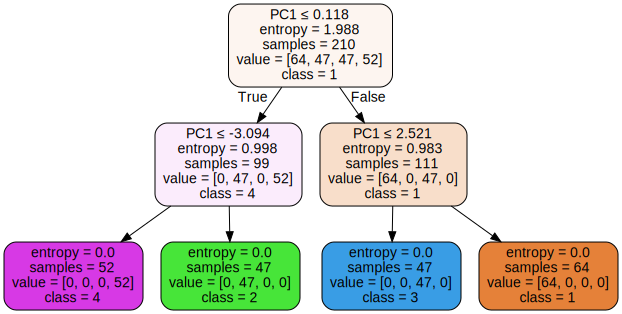

In [ ]:
#graph.render("iris") 
features=['PC1','PC2']
# features=['pH','DO','BOD','COD','Perm','SS','NH3','Nitrates','Chlorides','Fe','Mang','AB','CCL']
classes=['1','2','3','4']

from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_c, y_ori, test_size = 0.3, random_state = 10) 
X_train, X_test, y_train, y_test = train_test_split(X_c, y_hc, test_size = 0.3, random_state = 10) 

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn import tree
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 25,max_features=2,max_depth=2) #PE Random_state = 25,  #PP Random_state = 0. #PET Random_state=25
classifier.fit(X_train, y_train)
# classifier.fit(X_c, y_kmeans)
#tree.plot_tree(classifier)

r=export_text(classifier,feature_names=features)
print(r)




import graphviz 
dot_data = tree.export_graphviz(classifier, out_file=None, 
                     feature_names=features,  
                      class_names=classes,  
                      filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data) 
graph

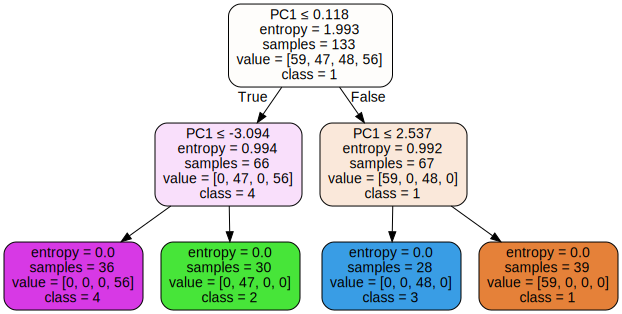

In [ ]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0,max_features=2,max_depth=2)
classifier2.fit(X_train, y_train)
estimator=classifier2.estimators_[5]

dot_data2 = tree.export_graphviz(estimator, out_file=None, 
                     feature_names=features,  
                      class_names=classes,  
                      filled=True, rounded=True,  
                     special_characters=True)  
graph2 = graphviz.Source(dot_data2) 
graph2

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

y_pred2 = classifier2.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)
print(accuracy_score(y_test, y_pred2))

target_names = classes
print(classification_report(y_test, y_pred, target_names=target_names))
print(classification_report(y_test, y_pred2, target_names=target_names))

[[22  0  0  0]
 [ 0 15  0  0]
 [ 0  0 27  0]
 [ 0  0  0 26]]
1.0
[[22  0  0  0]
 [ 0 15  0  0]
 [ 0  0 27  0]
 [ 0  0  0 26]]
1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00        26

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00        26

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90

